In [2]:
import pandas as pd
import numpy as np

In [2]:
a=pd.Series([1,2,5,6,np.nan])

In [16]:
dates=pd.date_range('20190303',periods=8)
onedf=pd.DataFrame(np.random.randn(16).reshape((8,2)),index=dates,columns=['kuai','le'])
onedf

,kuai,le
2019-03-03,1.466441,0.084449
2019-03-04,1.257954,-2.223248
2019-03-05,0.714390,0.397427
2019-03-06,-0.057019,-0.623295
2019-03-07,-0.894207,-0.111526
2019-03-08,0.840102,-0.666611
2019-03-09,-0.394718,-0.507339
2019-03-10,-1.950451,-0.746113


In [17]:
print(onedf['kuai'])

2019-03-03    1.466441
2019-03-04    1.257954
2019-03-05    0.714390
2019-03-06   -0.057019
2019-03-07   -0.894207
2019-03-08    0.840102
2019-03-09   -0.394718
2019-03-10   -1.950451
Freq: D, Name: kuai, dtype: float64


In [21]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [22]:
[3]*4

[3, 3, 3, 3]

In [24]:
df2['C']

0    1.0
1    1.0
2    1.0
3    1.0
Name: C, dtype: float32

In [31]:
[3,4]

array([ 9, 12])

In [32]:
print(df2.index,df2.columns,df2.values)

Int64Index([0, 1, 2, 3], dtype='int64') Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object') [[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


In [33]:
print(df2.describe())

         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0


In [36]:
print(df2.sort_index(axis=1,ascending=False))

     F      E  D    C          B    A
0  foo   test  3  1.0 2013-01-02  1.0
1  foo  train  3  1.0 2013-01-02  1.0
2  foo   test  3  1.0 2013-01-02  1.0
3  foo  train  3  1.0 2013-01-02  1.0


In [38]:
print(df2.sort_values(by='D',ascending=True))

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [78]:
#select data in pandas
c=pd.DataFrame(np.arange(12).reshape(3,4),index=['e','f','g'],columns=['A','B','C','D'])
c

,A,B,C,D
e,0,1,2,3
f,4,5,6,7
g,8,9,10,11


In [50]:
#1.select several raws or columns
print(c[0:2])#Attention,0:2 means the first raw and the second raw but not the third raw.

   A  B  C  D
e  0  1  2  3
f  4  5  6  7


In [56]:
print(c['e':'g'])#only select lines in this way.

   A  B   C   D
e  0  1   2   3
f  4  5   6   7
g  8  9  10  11


In [54]:
print(c.loc[:,'A':'D'])#2.loc function selects by labal.

   A  B   C   D
e  0  1   2   3
f  4  5   6   7
g  8  9  10  11


In [59]:
print(c.iloc[[1,2],1:3])#3.iloc for positional indexing. Notice!loc and iloc both need Bracket.

   B   C
f  5   6
g  9  10


In [60]:
print(c.ix[:2,['A']])#warming! ix is deprecated. 

   A
e  0
f  4


E:\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [80]:
#Conditional screening

print(c[c.A>5])

   A  B   C   D
g  8  9  10  11


In [90]:
##set specific value for dataframe.
c.A #When we use df.(column's name),it only shows column value but not line.)
c

,A,B,C,D
e,0,1,2,3
f,4,5,6,7
g,0,9,10,11


In [94]:
#increase column: c[new name]
#increase line:c.loc[new name]
#increase serice, pay attention on index must be the same as previous index or it will add NAN automatically.
c['T']=pd.Series([1,2,3],index=['e','f','g'])
c

,A,B,C,D,T
e,0,1,2,3,1
f,4,5,6,7,2
g,0,9,10,11,3


In [100]:
#Add missing data
df3=pd.DataFrame(np.random.randn(12).reshape(3,4),columns=['a','b','c','d'])
df3.iloc[1,3] = np.nan
df3.iloc[2,0] = np.nan
print(df3)

          a         b         c         d
0 -0.360199 -0.690090 -0.272385  1.334732
1  1.650955 -0.828338 -0.214115       NaN
2       NaN -1.203019  0.481956 -2.831625


In [102]:
#determine whether there are nan in dataframe.
df3.isnull()
#overall
np.any(df3.isnull()) == True

True

In [107]:
#delete and fill
df3.dropna(axis = 1, how = 'any' )# how = 'any' or 'all', if how = all, only when all values is nan in this line,we drop it
df3.fillna(value = 0)

,a,b,c,d
0,-0.360199,-0.690090,-0.272385,1.334732
1,1.650955,-0.828338,-0.214115,0.000000
2,0.000000,-1.203019,0.481956,-2.831625


In [114]:
data = pd.read_excel('F:\\test.xlsx')
print(data)
data.to_pickle('test.pickle')

   学号  姓名  成绩
0   1  雄安  68
1   2  小红  98
2   3  小明  45
3   4  小强  32
4   5  小刚  65


In [33]:
#COMCATENATION default value :axis = 0,vertical stack.
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
res1 = pd.concat([df1,df2],axis = 1)

## ignore index
res2 = pd.concat([df1,df2],ignore_index = True)  #only 'ignore index' , no ignore column.
print(res2)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


In [24]:
##join method(inner and outer, default is outter, just like addition)
df3 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df4 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
res3 = pd.concat([df3,df4], join = 'inner');# when we use inner, only same parts will be left.
res4 = pd.concat([df3,df4], join = 'outer')
print(res3)


     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0


E:\python\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [28]:
## join_axes: concatenating according to index or column.
res5 = pd.concat([df3,df4], join_axes =[ df3.index],axis = 1)
res5

,a,b,c,d,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [31]:
#append just support to vertical stick
df5 = pd.DataFrame(np.ones((3,4))*2, columns=['b','c','d','e'], index=[2,3,4])
res6 = df3.append([df4,df5],ignore_index = True)
res6

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0
5,NaN,1.0,1.0,1.0,1.0
6,NaN,2.0,2.0,2.0,2.0
7,NaN,2.0,2.0,2.0,2.0
8,NaN,2.0,2.0,2.0,2.0


In [39]:
#merge
"""
left1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})## 直接输入：pd.DataFrame({'A':['A1','A2','A3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})
re1 = pd.merge(left,right,on='key')# merge based on key column.
                              """

NameError: name 'left1' is not defined

In [42]:
#indicator:put the addition information on the last column.
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
#how = inner, outer, left, right
re2 = pd.merge(left,right, on=['key1','key2'],how='outer',indicator = True);
re3 = pd.merge(left,right, on=['key1','key2'],how='inner');
re4 = pd.merge(left,right, on=['key1','key2'],how='left');
re5 = pd.merge(left,right, on=['key1','key2'],how='right');
print(re2,re3,re4,re5)

  key1 key2    A    B    C    D      _merge
0   K0   K0   A0   B0   C0   D0        both
1   K0   K1   A1   B1  NaN  NaN   left_only
2   K1   K0   A2   B2   C1   D1        both
3   K1   K0   A2   B2   C2   D2        both
4   K2   K1   A3   B3  NaN  NaN   left_only
5   K2   K0  NaN  NaN   C3   D3  right_only   key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2   key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN   key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3


In [43]:
#use 'suffixes' to handle overlapping.
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})

res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')#renames.
print(res)

    k  age_boy  age_girl
0  K0        1         4
1  K0        1         5


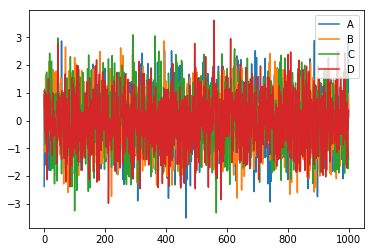

In [62]:
#plot function(1)Series
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
"""data = pd.Series(np.random.randn(1000))
data.cumsum()
data.plot()
plt.show()"""
#(2)plot DataFrame
data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
    )
np.cumsum(data)
data.plot()
plt.show()